![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 描述统计学部分的代码展示
- 项目四预告：1/3
- 本章节课件时间安排

[讲师个人主页](https://www.zhang-ran.com)

> 开始录屏，直播中网络延时的问题，直接在班级微信群@我（分享屏幕过程中看不到教室留言）

`直方图`

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83.png
)

- 负偏态 / 左偏分布
- 特性: 平均数 < 中位数 < 众数

- 正态分布
- 平均数 = 中位数 = 众数

- 正偏态 / 右偏态分布
- 平均数 > 中位数 > 众数

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Klout_score.csv')

In [3]:
df[:10]

,data
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690
5,53.338099
6,22.360882
7,26.515078
8,52.737316
9,40.235152


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
type(df.data)

pandas.core.series.Series

In [6]:
data = df.data
data[:10]

0    25.104179
1    60.908747
2    23.222238
3    51.553491
4    22.629690
5    53.338099
6    22.360882
7    26.515078
8    52.737316
9    40.235152
Name: data, dtype: float64

In [7]:
# 中位数

median = data.median()
median

41.094682995

In [8]:
# 平均值

mean = data.mean()
mean

37.71905483253817

In [9]:
# 为什么众数要加个 [0] 

x = [1,1,2,2]
x = pd.DataFrame(x)
x.mode()

,0
0,1
1,2


In [10]:
# 众数

data.mode()

0    10.0
dtype: float64

In [11]:
# 极差

data.max() - data.min()

77.24752923

In [12]:
# 四分位数

data.quantile(.25), data.quantile(.5), data.quantile(.75)

(23.17462012, 41.094682995, 50.28443155)

![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/%E6%96%B9%E5%B7%AE%E5%85%AC%E5%BC%8F.png
)

In [13]:
# 方差
# 统计中的方差（样本方差）是每个样本值与全体样本值的平均数之差的平方值的平均数

((data - data.mean())**2).sum()/len(data), data.var()

(257.1744133347726, 257.4200431469357)

In [14]:
# 标准差
# 标准差是方差的算术平方根。标准差能反映一个数据集的离散程度

std = math.sqrt(((data - data.mean())**2).sum()/len(data))
std

16.036658421715313

> [方差公式](https://baike.baidu.com/item/%E6%96%B9%E5%B7%AE/3108412?fr=aladdin)  &  [标准差公式](https://baike.baidu.com/item/%E6%A0%87%E5%87%86%E5%B7%AE/1415772?fr=aladdin)

- 计算图像直方图时，需要将颜色空间划分为若干个小的颜色空间，及直方图的bin。通过计算颜色在每个小区间内德像素得到颜色直方图，bin越多，直方图对颜色的分辨率越强，但增加了计算机的负担。

/Users/Ran/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


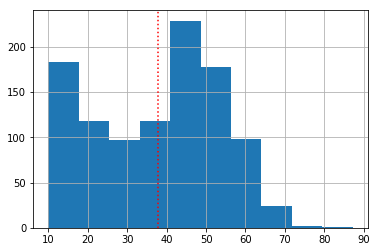

In [15]:
# 直方图
fig = data.hist(bins = 10);

# 垂直线
fig.axvline(color='r',x = data.mean(), linestyle = 'dotted');

In [16]:
# 使用random.choice生成3*5的值只有0和1的
# 其中0出现的机率为0.3，1为0.7

np.random.choice(2, (3,5), p = [.3, .7])

array([[1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1]])

In [17]:
# 使用random.randint生成3*3的矩阵，值域为0-5的整数

np.random.randint(5, size = (3,3))

array([[4, 1, 1],
       [4, 2, 4],
       [3, 4, 1]])

In [18]:
# 使用np.arange输出1-21里面的奇数

np.arange(1,22,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

> 样本问题
- 样本大小为35人, 即 n = 35
- 每个样本平均值和总体平均值一致,即 $\mu = 40$
- 总体标准差为 $\sigma$
- 求样本标准差 
- 标准偏差 standard error
- 模拟生成一个 sample 数列

$$样本标准偏差 = \frac{\sigma}{\sqrt{n}}$$  
   
> 附数学特殊符号表：https://www.jianshu.com/p/7c34f5099b7e

In [19]:
# 样本的标准差

sstd = std/math.sqrt(35)
sstd

2.7106900193481187

In [20]:
# 模拟一个sample_distribution

normal_list = np.random.normal(loc = mean, scale = std, size = len(data))
sample_list = np.random.normal(loc = mean, scale = sstd, size = 35)

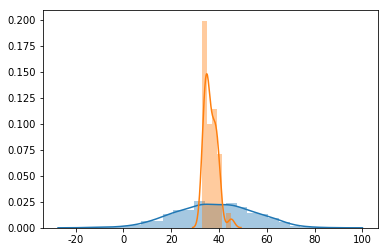

In [21]:
# 对比总体正态分布
sns.distplot(normal_list);

# 样本的正态分布
sns.distplot(sample_list);

<a id='00'></a>

## 课件目录

<ul>
<li><a href="#01">01：快速把握数据集概况</a></li>
    
<li><a href="#02">02：了解基于此数据集的分析结果和背景知识</a></li>

<li><a href="#03">03：使用Python呈现出此数据集的描述统计学特性</a></li>

</ul>

>- 备注：文件排版和锚链接

<a id='01'></a>
## 01：快速把握数据集概况

In [22]:
import pandas as pd
df = pd.read_csv('ab-data.csv')

In [23]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


涉及的变量有：用户ID、时间、组别：控制组和实验组、页面分组：旧页面和新页面、是否转化

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='02'></a>

## 02：了解基于此数据集的分析结果和背景知识

>- 我们的分析目标是：基于上面你所掌握的数据集，通过使用统计学、回归、Pyhton等手段来帮助公司分析和决定他们是否应该使用新的页面或保留旧的页面

>- 其中统计学知识和回归我们会通过下面的分析一一带出，但是现在的问题是：用什么方法分析，这个方法是怎样的？

1.方法选择？

    因为我们我们数据集里面有两组数据，新旧页面（对应了测试组合控制组），所以我们需要一种可以横向对比两组数据结果的分析方法，那么商业实践中常用的就是A/B测试。

2.那么什么是A/B测试呢？

    AB测试是为Web或App界面或流程制作两个（A/B）或多个（A/B/n）版本，在同一时间维度，分别让组成成分相同（相似）的访客群组（目标人群）随机的访问这些版本，收集各群组的用户体验数据和业务数据，最后分析、评估出最好版本，正式采用。

3.A/B测试参考资料：
>- https://baike.baidu.com/item/AB%E6%B5%8B%E8%AF%95/9231223?fr=aladdin
>- https://www.zhihu.com/question/20045543

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

<a id='03'></a>
## 03：使用Python呈现出此数据集的描述统计学特性

In [25]:
# 这个数据集有多少行多少列？

df_row, df_column = df.shape

print('这个数据集有 {} 行 {} 列。'.format(df_row,df_column))

这个数据集有 294478 行 5 列。


In [26]:
# 用户去重

print(df['user_id'].nunique())

290584


In [27]:
# 用户转化
# 方法一

round(df['converted'].sum() / df['user_id'].count(), 4)

0.1197

In [28]:
# 用户转化
# 方法二

round(df['converted'].mean(), 2)

0.12

In [29]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [30]:
# 计算数据中 new_page 与 treatment 不匹配的次数
# 包含了两种不同的情况之和
# 控制组对应新页面、实验组对应旧页面

df[(df['landing_page']=='new_page') & (df['group'] != 'treatment')].shape[0] + \
df[(df['landing_page']=='old_page') & (df['group'] != 'control')].shape[0]

3893

In [31]:
# 方法二

df[(df['landing_page']=='new_page') & (df['group'] == 'control')].shape[0] + \
df[(df['landing_page']=='old_page') & (df['group'] == 'treatment')].shape[0]

3893

In [32]:
# 此数据集中缺失值的情况

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [33]:
# 创建一个符合要求的新数据集 df2
# 控制组(control) 应该对应旧页面(old_page)，实验组(treatment) 对应新页面(new_page)

df2 = df[(df['group']=='treatment') & (df['landing_page'] == 'new_page')].append(df[(df['group']=='control') & (df['landing_page'] == 'old_page')], ignore_index = True)


In [34]:
print (df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])

0


In [35]:
# 查看新数据集的信息

In [36]:
df2['user_id'].nunique()

290584

In [37]:
df2[df2['user_id'].duplicated() == True] # 试试 False True

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [38]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [40]:
df2 = df2.drop_duplicates(['user_id'])
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


>- 概率分析

In [42]:
# 不管收到什么页面，单个用户的转化率是多少？

round(df2['converted'].mean(), 4)

0.1196

In [64]:
# control 组用户的转化率是多少？
# 2种方法对比

round(df2[df2['group'] == 'control']['converted'].mean(), 2) 

# round(df2.query('group == "control"')['converted'].mean(), 2)

0.12

In [44]:
# treatment 组中，他的转化率是多少？

round(df2.query('group == "treatment"')['converted'].mean(), 4)


0.1188

In [45]:
# 一个用户收到新页面的概率是多少？

round(df2.query('landing_page=="new_page"').shape[0] / df2.shape[0], 4)

0.5001

### 分析到这里，你是否认为有足够的数据支持来证明旧页面或者新页面可以带来更高的转化率？

>- 写下你的思考

<ul>
<li><a href="#00">返回课件目录</a></li>
</ul>

> 常见问题和小练习

# Coin Flips and Die Rolls
Use NumPy to create simulations and compute proportions for the following outcomes. The first one is done for you.

In [65]:
import numpy as np

### Two dice roll a double

In [66]:
# simulate the first million die rolls
first = np.random.randint(7,size=(int(1e6), 1))

# simulate the second million die rolls
second = np.random.randint(7,size=(int(1e6), 1))

# proportion of tests where the 1st and 2nd die rolled the same number
(first == second).mean()

0.142739

In [71]:
tests = np.random.randint(2, size=(int(1e6), 2))
tests

array([[0, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]])

In [49]:
len(tests)

1000000

In [50]:
tests.sum(axis=1)

array([1, 1, 0, ..., 1, 2, 0])

In [51]:
test_sums = tests.sum(axis=1)

In [52]:
test_sums == 0

array([False, False,  True, ..., False, False,  True])

In [53]:
# 分别试试 0、1、2

(test_sums == 0).mean()

0.25067

### Two fair coin flips produce exactly two heads

In [72]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 2).mean()

0.250419

### Three fair coin flips produce exactly one head

In [55]:
# simulate 1 million tests of three fair coin flips

tests = np.random.randint(2, size=(int(1e6), 3))

In [56]:
# sums of all tests

test_sums = tests.sum(axis=1)
test_sums

array([2, 1, 3, ..., 2, 3, 2])

In [57]:
# proportion of tests that produced exactly one head

(test_sums == 1).mean()

0.374922

In [58]:
(test_sums == 2).mean()

0.375197

### Three biased coin flips with P(H) = 0.6 produce exactly one head

In [74]:
# simulate 1 million tests of three bias coin flips
# hint: use np.random.choice()
tests = np.random.choice([0, 1], size=(int(1e6), 3), p=[0.6, 0.4])

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

0.287958

In [60]:
np.random.randint(5, size=(2, 4))

array([[4, 3, 0, 1],
       [1, 3, 0, 1]])

### A die rolls an even number

In [61]:
# simulate 1 million tests of one die roll
# proportion of tests that produced an even number

tests = np.random.randint(7, size=(int(1e6), 1))
(tests%2 == 0).mean()

0.571617

In [62]:
# simulate 1 million tests of one die roll
tests = np.random.choice(np.arange(1, 7), size=int(1e6))

# proportion of tests that produced an even number
(tests % 2 == 0).mean()

0.499881